# Problema 1

In [3]:
#Paquetes para el problema 1
import random
import numpy as np
import matplotlib.pyplot as plt

## a) Direct_pi()

In [4]:
def direct_pi(N):
  N_hits = 0

  for i in range(N):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    if x**2 + y**2 <= 1:
      N_hits += 1

  return N_hits

#Creamos los valores en los que se va a correr la función y el arreglo para
#almacenar la desviación estandar

N_vals = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
desvs_std = []

for N in N_vals:
  desvs = []
  for i in range(20):
    N_hits = direct_pi(N)
    desv = (N_hits/N - np.pi/4)**2
    desvs.append(desv)

  desv_std = np.sqrt(np.mean(desvs))
  desvs_std.append(desv_std)
  print(f'N = {N}, Desviacion cuadrática media: {desv_std}')

N = 10, Desviacion cuadrática media: 0.11367135479141871
N = 100, Desviacion cuadrática media: 0.03331639851370853
N = 1000, Desviacion cuadrática media: 0.012447080770721047
N = 10000, Desviacion cuadrática media: 0.0031360496426109997
N = 100000, Desviacion cuadrática media: 0.0012601081496025053
N = 1000000, Desviacion cuadrática media: 0.0004123558848672506
N = 10000000, Desviacion cuadrática media: 0.00014524885284632544
N = 100000000, Desviacion cuadrática media: 3.796369103159531e-05


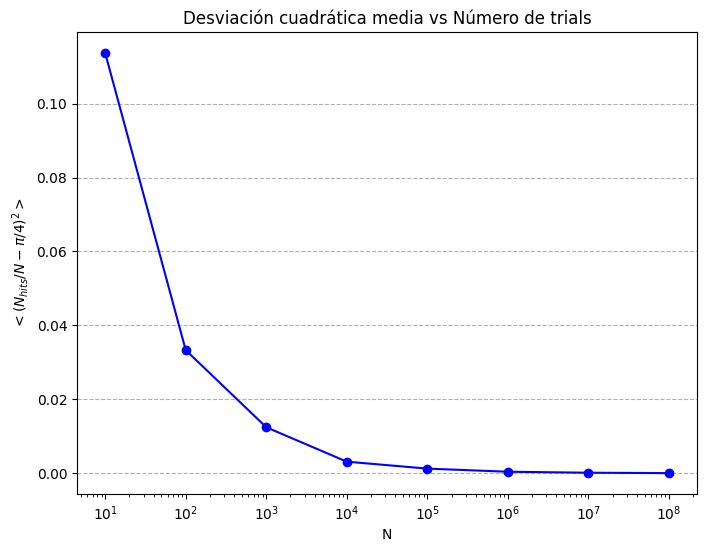

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(N_vals, desvs_std, marker='o', linestyle='-', color='blue')
plt.xlabel('N')
plt.xscale('log') #se utiliza escala log en el eje x para mejor visualizacion
plt.ylabel('$<(N_{hits}/N - \pi/4)^2>$')
plt.title('Desviación cuadrática media vs Número de trials')
plt.grid(True, axis = 'y', ls="--")
plt.show()

Para determinar como escala  la desviación cuadrática media con N, tomamos de forma logaritmica ambas listas y se hace una regresión lineal donde la pendiente $m$ será el factor del exponente:

In [8]:
log_N_vals = np.log10(N_vals)
log_desvs_std = np.log10(desvs_std)
m,b = np.polyfit(log_N_vals, log_desvs_std, 1)
print(f'Exponente de escala: {m}')

Exponente de escala: -0.487762690100429


Se ha encontrado que:

 *Desviacion cuadrática media*  $\sim \frac{1}{\sqrt{N}}$


## b) Markov_pi()

In [9]:
#Implementación de la función markov_pi()
def markov_pi(N, delta):
    N_hits = 0
    rechazo = 0
    x, y = 1, 1

    for i in range(N):
        delta_x = random.uniform(-delta, delta)
        delta_y = random.uniform(-delta, delta)

        if abs(x + delta_x) <= 1 and abs(y + delta_y) <= 1:
            x += delta_x
            y += delta_y
        else:
          rechazo += 1

        if x**2 + y**2 < 1:
            N_hits += 1

    taza_rechazo = rechazo/N
    return N_hits, taza_rechazo

Utilizando $\delta = 0.3$ podemos al igual que el ejercicio previo demostrar que $N_{hits}/N$ converge a $\frac{\pi}{4}$

In [11]:
N_vals = [10, 100, 1000, 10000, 100000, 1000000]
desvs_std = []

for N in N_vals:
  desvs = []
  for i in range(20):
    N_hits,taza_rechazo = markov_pi(N,0.3) #se tomó \delta = 0.3
    desv = (N_hits/N - np.pi/4)**2
    desvs.append(desv)

  desv_std = np.sqrt(np.mean(desvs))
  desvs_std.append(desv_std)
  print(f'N = {N}, Desviacion cuadrática media: {desv_std}')

N = 10, Desviacion cuadrática media: 0.6268835987973818
N = 100, Desviacion cuadrática media: 0.17428149873652574
N = 1000, Desviacion cuadrática media: 0.03641760343536709
N = 10000, Desviacion cuadrática media: 0.011975119202685507
N = 100000, Desviacion cuadrática media: 0.0036981527621579363
N = 1000000, Desviacion cuadrática media: 0.0014699546193748427


Ahora vamos a graficar la desviación cuadrática media $⟨(N_{hits}/N − \pi/4)^2⟩$, para $N=10^6$, como función de $\delta \in [0,3]$

In [12]:
N = 1000000
deltas = np.linspace(0, 3, 50)
desvs_std_deltas = []
taza_rechazos = []

for delta in deltas:
  desvs = []
  for i in range(20):
    N_hits, taza_rechazo = markov_pi(N, delta)
    desv = (N_hits/N - np.pi/4)**2
    desvs.append(desv)

  desv_std = np.sqrt(np.mean(desvs))
  desvs_std_deltas.append(desv_std)
  taza_rechazos.append(taza_rechazo)

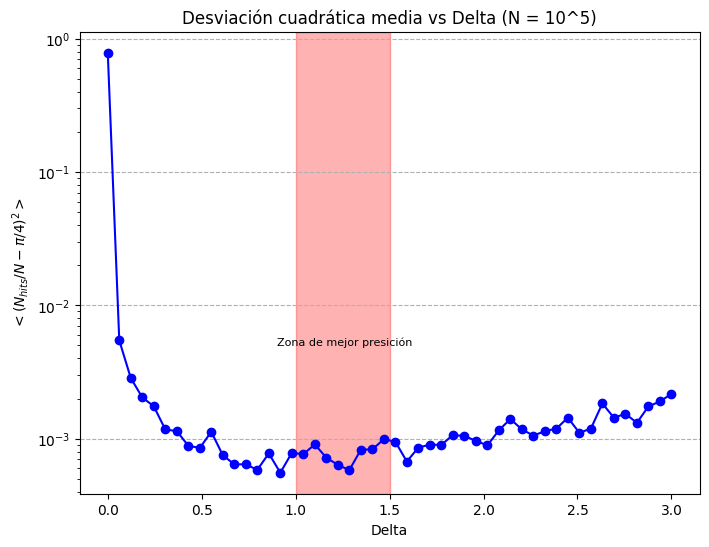

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(deltas, desvs_std_deltas, marker='o', linestyle='-', color='blue')
plt.xlabel('Delta')
plt.yscale('log') #se utiliza escala log en el eje y para mejor visualizacion
plt.ylabel('$<(N_{hits}/N - \pi/4)^2>$')
plt.text(0.9, 0.005, 'Zona de mejor presición', fontsize = 8)
plt.axvspan(1, 1.5, color='red', alpha=0.3)
plt.title('Desviación cuadrática media vs Delta (N = 10^5)')
plt.grid(True, axis = 'y', ls="--")
plt.show()

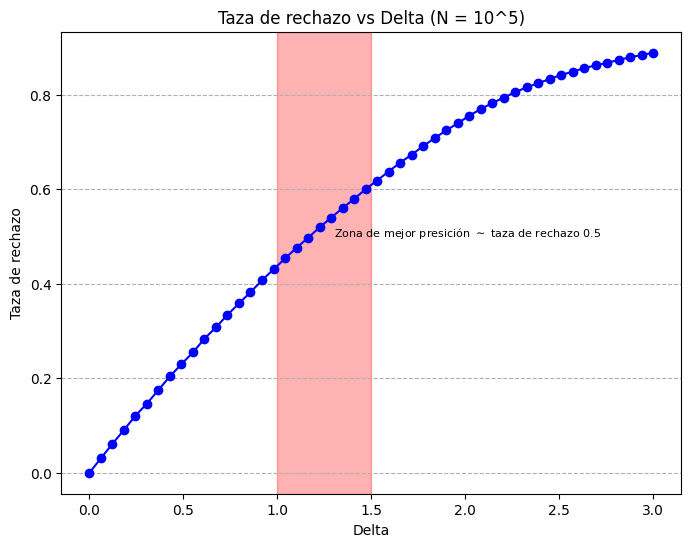

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(deltas,taza_rechazos, marker='o', linestyle='-', color='blue')
plt.xlabel('Delta')
plt.ylabel('Taza de rechazo')
plt.text(1.3, 0.5, 'Zona de mejor presición $\sim$ taza de rechazo $0.5$', fontsize = 8)
plt.axvspan(1, 1.5, color='red', alpha=0.3)
plt.title('Taza de rechazo vs Delta (N = 10^5)')
plt.grid(True, axis = 'y', ls="--")
plt.show()